<a href="https://colab.research.google.com/github/ProsperChuks/metrics/blob/main/simple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from statistics import mean
import pandas as pd
import matplotlib.pyplot as plt

Text(0, 0.5, 'Cooling_Load')

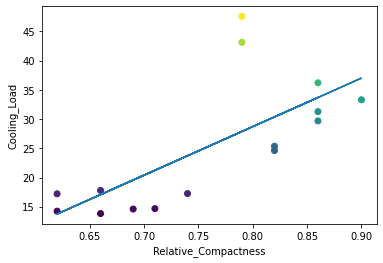

In [3]:
path = '/content/drive/MyDrive/Colab Notebooks/regression/linear/hamoye/ENB2012_data.xlsx'

df = pd.read_excel(path)

new_col_names = {'X1':'Relative_Compactness', 'X2': 'Surface_Area',
                 'X3': 'Wall_Area', 'X4': 'Roof_Area', 'X5': 'Overall_Height',
                 'X6': 'Orientation', 'X7': 'Glazing_Area',
                 'X8': 'Glazing_Area_Distribution',
                 'Y1': 'Heating_Load', 'Y2': 'Cooling_Load'}

df = df.rename(columns=new_col_names)

simple_lin_reg_df = df[['Relative_Compactness', 'Cooling_Load']].sample(15, random_state=2)

xs = simple_lin_reg_df['Relative_Compactness']
ys = simple_lin_reg_df['Cooling_Load']

'%.2f'%xs.corr(ys)

def best_fit_slope_and_y_intercept(xs, ys):

  m = (((mean(xs) * mean(ys)) - mean(xs * ys)) /
       (mean(xs)**2 - mean(xs**2)))
  b = mean(ys) - m*mean(xs)
  return m, b

m, b = best_fit_slope_and_y_intercept(xs, ys)

regression_line = [(m*x) + b for x in xs]

plt.scatter(xs, ys, c=ys)
plt.plot(xs, regression_line)
plt.xlabel('Relative_Compactness')
plt.ylabel('Cooling_Load')

## metrics

### mean absolute error

In [52]:
# firstly normalizing the dataset to a common scale using min max scaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

scaler = MinMaxScaler()
normalized_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
predictors_df = normalized_df.drop(columns=['Heating_Load', 'Cooling_Load'])
heating_target = normalized_df['Heating_Load']

x_train, x_test, y_train, y_test = train_test_split(predictors_df, heating_target, test_size=0.3, random_state=1)

linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

predicted_values = linear_model.predict(x_test)
predicted_values

#MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
'%.3f'%mae

'0.063'

### residual sum of squares

In [53]:
rss = np.sum(np.square(y_test - predicted_values))
'%.3f'%rss

'1.823'

### root mean square error

In [54]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
'%.3f'%rmse

'0.089'